# Name : Faraz khan

# Task 1 

# Data Science and Business Analytics Internship

In this task,  we will predict the percentage of marks that a student is expected to get based upon the number of hours they studied and will try to find out with some otehr input as well and see if we can get the desired reuslts.

In [1]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#By suing this %matplotlib inline, we can show the plot just after each cell when that cell is executed.

In [2]:
#Reading the data
data = pd.read_csv("student_scores - student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Cheking if there is any null value in the dataset

In [3]:
data.isnull==True

False

There is no null value , so we can now visualize our data.

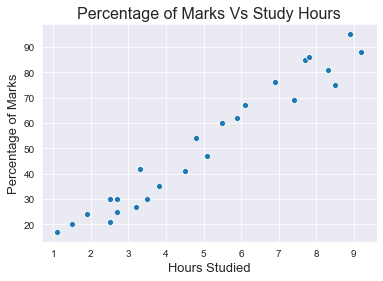

In [4]:
import seaborn as sns
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Percentage of Marks Vs Study Hours',size=16)
plt.ylabel('Percentage of Marks', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

From the above scatter plot there looks to be correlation between the 'Percentage of Marks' and 'Hours Studied',
Lets plot a regression line to confirm the correlation.

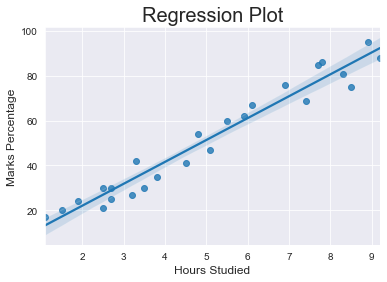

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

Yes the variables are positively correlated.

# Training the Model

Splitting the data 

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Fitting the data into the model

In [7]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---Model is Trained Successfully---")

---Model is Trained Successfully---


# Predicting the Percentage of Marks

In [8]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the predicted marks with the Actual Marks

In [9]:
compare_marks = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_marks

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Visually comparing the ACtual MArks and predicted marks

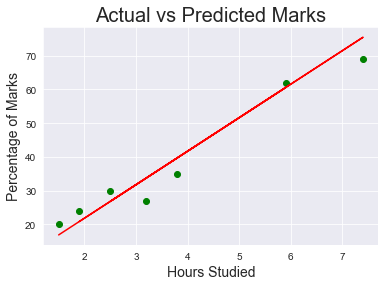

In [10]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Red')
plt.title('Actual vs Predicted Marks', size=20)
plt.ylabel('Percentage of Marks', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

Evaluating the Model for its accuracy

In [11]:
#accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


The lower value of MAE defines that the chances of error or wrong forecasting through the model are very less.

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [12]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the model, if a student studies for 9.25 hours a day then, he/she is likely to score 93.89 marks.

# What will be the predicted score of a student if he/she studies for 10 hrs/ day?

In [13]:
hours = [10]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 101.349


# What will be the predicted score of a student if he/she studies for 12 hrs/ day?

In [14]:
hours = [12]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 121.232
